## Observations and Insights

In [ ]:
there was almost as many female mice as male mice.
capomulin and ramicane treatments were applied on more mice than the other treatments
there are not potential outliers in the average tumor volumes within the most promising treatments, wich means the four of them worked very similar with all of the mice.
the weight of mice is related to the average tumor volume in 95% in the capomulin treatment



## Dependencies and starter code

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata=mouse_metadata.merge(study_results, on='Mouse ID')
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regim_df=mouse_metadata[['Drug Regimen','Tumor Volume (mm3)']]
regim_df=regim_df.groupby(['Drug Regimen'])
reg_mean=round(regim_df.mean(),2)
reg_median=round(regim_df.median(),2)
reg_var=round(regim_df.var(),2)
reg_std=round(regim_df.std(),2)
reg_sems=round(regim_df.sem(),2)

summary_stats=reg_mean.merge(reg_median, on='Drug Regimen')
summary_stats=summary_stats.rename(columns={'Tumor Volume (mm3)_x':'Mean',
                                           'Tumor Volume (mm3)_y':'Median'})
summary_stats=summary_stats.merge(reg_var, on="Drug Regimen")
summary_stats=summary_stats.merge(reg_std, on='Drug Regimen')
summary_stats=summary_stats.merge(reg_sems, on='Drug Regimen')
summary_stats=summary_stats.rename(columns={'Tumor Volume (mm3)_x':'Variance',
                                           'Tumor Volume (mm3)_y':'Std Deviation',
                                           'Tumor Volume (mm3)':'Std Error'})
summary_stats

,Mean,Median,Variance,Std Deviation,Std Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

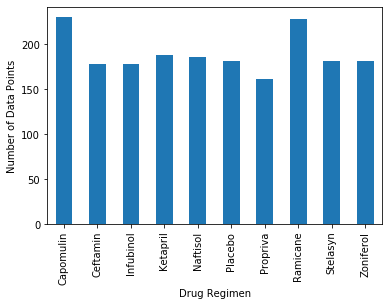

<Figure size 432x288 with 0 Axes>

In [80]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regim_count = regim_df['Tumor Volume (mm3)'].count()

regim_chart = regim_count.plot(kind="bar")
regim_chart.set_xlabel("Drug Regimen")
regim_chart.set_ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

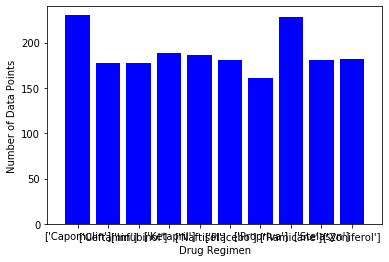

In [81]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs_regimen=regim_df['Drug Regimen'].unique()
x_axis = np.arange(0, len(drugs_regimen))
xticks = []
for x in x_axis:
    xticks.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.xlim(-1, len(drugs_regimen)-.01)
plt.ylim(0, max(regim_count) + 10)

plt.bar(x_axis,regim_count , facecolor="blue", alpha=1, align="center")
plt.xticks(xticks,drugs_regimen)
plt.show()

## Pie plots

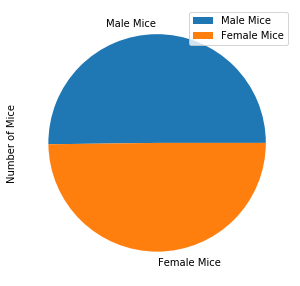

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=mouse_metadata[['Mouse ID', 'Sex']]
gender_df=gender_df.drop_duplicates(subset='Mouse ID', keep="first")
total_mouse=gender_df['Mouse ID'].count()
group_mouse=gender_df['Sex'].value_counts()
mousex_df=pd.DataFrame({'Number of Mice':[group_mouse[0], group_mouse[1]]},
                        index=['Male Mice','Female Mice'])
mousex_df.plot.pie(y='Number of Mice', figsize=(5, 5))


C:\Users\pj_lo\AppData\Local\Continuum\anaconda3\envs\PythonD\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


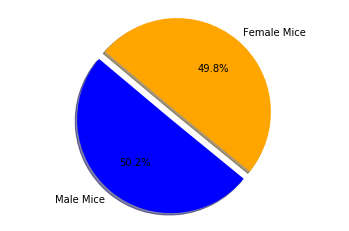

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male Mice', 'Female Mice'
sizes = mousex_df
colors = ['blue', 'orange']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
promising_regims_df=mouse_metadata[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
promising_regims_df=promising_regims_df.drop_duplicates(subset='Mouse ID', keep="last")
top_Regims=['Capomulin', 'Ramicane', 'Infubinol','Ceftami']
promising_regims_df=promising_regims_df[promising_regims_df['Drug Regimen'].isin(top_Regims)]

quartiles = promising_regims_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 35.248172675
The upper quartile of Tumor Volume is: 52.795519135
The interquartile range of Tumor Volume is: 17.54734646
The the median of Tumor Volume is: 40.1592203 
Values below 8.927152985 could be outliers.
Values above 79.11653882499999 could be outliers.


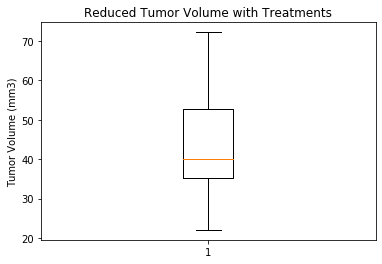

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volumes = promising_regims_df['Tumor Volume (mm3)']

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Reduced Tumor Volume with Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes, flierprops=green_diamond)
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

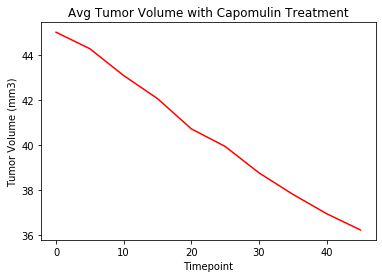

In [86]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap_regim=mouse_metadata[['Drug Regimen','Timepoint','Tumor Volume (mm3)']]
Capomulin=['Capomulin']
Cap_regim=Cap_regim[Cap_regim['Drug Regimen'].isin(Capomulin)]
Cap_regim=Cap_regim[['Timepoint','Tumor Volume (mm3)']]
Cap_regim=Cap_regim.groupby(['Timepoint'])
avg_tumor_vol=round(Cap_regim['Tumor Volume (mm3)'].mean(),2)
plt.plot(avg_tumor_vol, color="red")
plt.title("Avg Tumor Volume with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

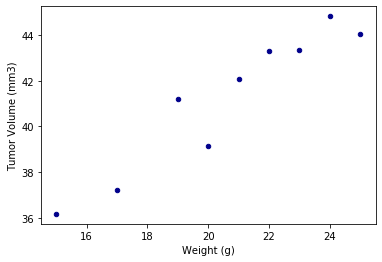

In [87]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_df=mouse_metadata[['Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
Capomulin=['Capomulin']
mouse_weight_df=mouse_weight_df[mouse_weight_df['Drug Regimen'].isin(Capomulin)]
mouse_weight_df=mouse_weight_df[['Weight (g)','Tumor Volume (mm3)']]
mouse_weight_df=mouse_weight_df.groupby(['Weight (g)'])
avg_tumvol=round(mouse_weight_df['Tumor Volume (mm3)'].mean(),2)
avg_tumvol=pd.DataFrame(avg_tumvol).reset_index()

avg_tumvol.plot.scatter(x='Weight (g)',
                      y='Tumor Volume (mm3)',
                      c='DarkBlue')

The correlation between both factors is 0.95


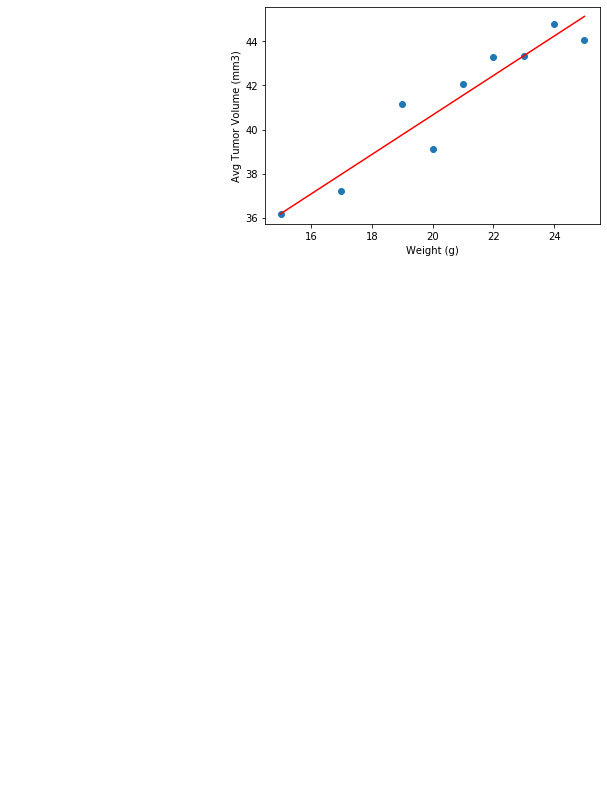

In [90]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = avg_tumvol['Weight (g)']
tumor_volume = avg_tumvol['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()